<a href="https://colab.research.google.com/github/NajlaZuhir/CRM_Data/blob/main/AI_profiling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature 1: AI profiling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
df = pd.read_csv("generated_data.csv")

In [3]:
df.head()

,Tourist_ID,Reservation_ID,passport_number,Name,Age,Gender,phone_number,Nationality,Nationality_group,family_size,...,Location,customer_tenure,package_types,package_cost,package_price,profit,Total_Spendings,Subscribed_to_Loyalty_Program,Rating_of_Services,Feedback
0,1001,1,634821537,Rodney Walker,73,Female,001-303-929-5260x66432,Puerto Rico,Other Africa,4,...,Al Rayyan,257,Cultural Tours,400,800,400,4119,True,3,The availability of information in multiple la...
1,1002,2,771000345,David Ibarra,47,Male,618-466-4946x1167,Bangladesh,Americans,6,...,Al Daayen,114,Sightseeing Tours,300,600,300,29474,True,3,"While the modern side is impressive, the prese..."
2,1003,3,344929595,Lisa Kennedy,27,Female,612-609-2135,Czech Republic,Other Arab,5,...,Doha,154,Beach and Resort Tours,800,1500,700,18037,False,5,"While the modern side is impressive, the prese..."
3,1004,4,816092364,Amy Cross,78,Male,001-633-374-1926x1179,Swaziland,Other Africa,3,...,Al Khor,1473,Beach and Resort Tours,800,1500,700,26650,True,5,The blend of modernity and tradition in Qatar ...
4,1005,5,937645299,Marie Mayo,44,Female,780-876-6294x750,Togo,Americans,1,...,Al Daayen,1553,Beach and Resort Tours,800,1500,700,29778,False,5,Qatar's rich history comes alive through its m...


# Preprosessing & Understanding the data

In [4]:
df.info()

#missing_values = df.isnull().sum()

# we will do more of that after making the data raw

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 45 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Tourist_ID                     5000 non-null   int64 
 1   Reservation_ID                 5000 non-null   int64 
 2   passport_number                5000 non-null   int64 
 3   Name                           5000 non-null   object
 4   Age                            5000 non-null   int64 
 5   Gender                         5000 non-null   object
 6   phone_number                   5000 non-null   object
 7   Nationality                    5000 non-null   object
 8   Nationality_group              5000 non-null   object
 9   family_size                    5000 non-null   int64 
 10  health_insurance               5000 non-null   object
 11  Date_Of_Reservation            5000 non-null   object
 12  Date_Of_arival                 5000 non-null   object
 13  arr

### Encoding columns

In [ ]:

df['arrival_nationality_encoded'] = df['arrival_nationality'].astype('category').cat.codes


# RFM analysis (Feature engineering )

RFM analysis numerically ranks a customer in each of these three categories, generally on a scale of 1 to 5 (the higher the number, the better the result)



**Scoring RFM**
-  As 'Recency_Score' increases, it indicates that the tourist visited more recently. (inversely proportional)
- As 'Frequency_Score' increases, it indicates that the tourist has visited more frequently. (positive)
- As 'Monetary_Score' increases, it indicates higher spending by the tourist. (positive)

In [5]:
# Convert 'Date_Of_arival' to datetime format
df['Date_Of_arival'] = pd.to_datetime(df['Date_Of_arival'])

# Calculate RFM
current_date = datetime.now()
df['Recency'] = (current_date - df['Date_Of_arival']).dt.days
df['Recency_Score'] = pd.cut(df['Recency'], bins=5, labels=[5, 4, 3, 2, 1])
df['Frequency_Score'] = pd.cut(df['Num_of_Visits'], bins=5, labels=[1, 2, 3, 4, 5])
df['Monetary_Score'] = pd.cut(df['Total_Spendings'], bins=5, labels=[1, 2, 3, 4, 5])


In [10]:
df[['Tourist_ID', 'Date_Of_arival', 'Recency_Score', 'Num_of_Visits', 'Frequency_Score',  'Total_Spendings', 'Monetary_Score']].head(10)


,Tourist_ID,Date_Of_arival,Recency_Score,Num_of_Visits,Frequency_Score,Total_Spendings,Monetary_Score
0,1001,2023-07-29,5,2,1,4119,1
1,1002,2023-02-13,5,2,1,29474,5
2,1003,2021-09-01,3,1,1,18037,3
3,1004,2020-01-18,1,3,2,26650,5
4,1005,2019-10-01,1,3,2,29778,5
5,1006,2021-12-04,3,7,5,12079,2
6,1007,2022-01-12,3,1,1,25559,5
7,1008,2019-04-23,1,3,2,26836,5
8,1009,2022-07-26,4,7,5,29815,5
9,1010,2023-09-22,5,4,3,5987,1


**Calculating RFM Overall**

RFM overall: evaluating customer behavior based on three key dimensions to better understand and engage with customers based on their historical behavior.

1-	Recency: Recent customers may be more likely to respond to promotions and engage with services. Therefore, we can assign a relatively higher weight. Let’s Pick (3)

2-	Frequency:  If the goal is to reward and retain loyal customers, we can assign a moderate weight to Frequency. Let’s Pick (2)

3-	Monetary: If high spenders are important, we can give a higher weight. But maybe the spender is a one time or rare so let’s pick (1)


In [11]:
# Assign weights to each component
weight_recency = 3
weight_frequency = 2
weight_monetary = 1

# Convert categorical scores to numeric
df['Recency_Score'] = df['Recency_Score'].astype(int)
df['Frequency_Score'] = df['Frequency_Score'].astype(int)
df['Monetary_Score'] = df['Monetary_Score'].astype(int)

# Calculate RFM scores
df['RFM_Score'] = (
    weight_recency * df['Recency_Score'] +
    weight_frequency * df['Frequency_Score'] +
    weight_monetary * df['Monetary_Score']
)

# Display the overall RFM scores
df[['Tourist_ID', 'Recency_Score', 'Frequency_Score', 'Monetary_Score', 'RFM_Score']].head()

,Tourist_ID,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score
0,1001,5,1,1,18
1,1002,5,1,5,22
2,1003,3,1,3,14
3,1004,1,2,5,12
4,1005,1,2,5,12


# Segmentation
Labelling customers based on the RFM overall

In [12]:
# Find the maximum RFM score
max_rfm_score = df['RFM_Score'].max()

# Create bins dynamically based on the maximum RFM score
bins = [0, max_rfm_score * 0.2, max_rfm_score * 0.4, max_rfm_score * 0.6, max_rfm_score * 0.8, max_rfm_score]
labels = ['Inactive or Lost', 'Churning or At Risk', 'Recent and Infrequent Visitors', 'Frequent Visitors', 'High-Value Tourists']

# Define the categories based on RFM scores
df['RFM_Category'] = pd.cut(df['RFM_Score'], bins=bins, labels=labels)
df['RFM_Category_encoded'] = pd.cut(df['RFM_Score'], bins=bins, labels=[0,1,2,3,4])

In [ ]:
# just to print
df[['Tourist_ID', 'Date_Of_arival', 'Recency_Score', 'Num_of_Visits', 'Frequency_Score',  'Total_Spendings', 'Monetary_Score', 'RFM_Score', 'RFM_Category', 'RFM_Category_encoded']].head(10)

,Tourist_ID,Date_Of_arival,Recency_Score,Num_of_Visits,Frequency_Score,Total_Spendings,Monetary_Score,RFM_Score,RFM_Category,RFM_Category_encoded
0,1000,2023-06-23,5,5,4,18643,3,26,High-Value Tourists,4
1,1000,2020-11-10,2,2,1,14570,3,11,Churning or At Risk,1
2,1000,2020-10-09,2,7,5,24374,4,20,Frequent Visitors,3
3,1000,2019-08-17,1,2,1,28442,5,10,Churning or At Risk,1
4,1000,2020-12-28,2,3,2,6996,1,11,Churning or At Risk,1
5,1000,2023-12-12,5,3,2,19388,4,23,Frequent Visitors,3
6,1000,2021-12-30,3,4,3,14761,3,18,Recent and Infrequent Visitors,2
7,1000,2023-03-01,5,1,1,27352,5,22,Frequent Visitors,3
8,1000,2021-02-10,3,7,5,22009,4,23,Frequent Visitors,3
9,1000,2019-05-06,1,5,4,19839,4,15,Recent and Infrequent Visitors,2


# Clustering

**Functions**

In [13]:
# prompt: generate function that uses elbow method to calculate optimal number of clusters

def elbow_method(data, max_clusters=10):
    distortions = []
    for i in range(1, max_clusters + 1):
        km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
        km.fit(data)
        distortions.append(km.inertia_)
    plt.plot(range(1, max_clusters + 1), distortions, marker='o')
    plt.xlabel("Number of clusters")
    plt.ylabel("Distortion")
    plt.show()


In [14]:
# prompt: generate function that uses silhouette method to calculate optimal number of clusters

def silhouette_method(data, max_clusters=10):
    silhouette_scores = []
    for i in range(2, max_clusters + 1):
        km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
        km.fit(data)
        silhouette_scores.append(silhouette_score(data, km.labels_))
    plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
    plt.xlabel("Number of clusters")
    plt.ylabel("Silhouette score")
    plt.show()


In [ ]:
# prompt: function that uses kmenas to generate and plot clusters. it has two parameter number of clusters and data

def cluster_and_plot(data, num_clusters):
  km = KMeans(n_clusters=num_clusters, init='k-means++', n_init=10, max_iter=300, random_state=0)
  km.fit(data)
  plt.scatter(data[:, 0], data[:, 1], c=km.labels_, cmap='viridis')
  plt.title('Clusters of data')
  plt.xlabel('X1')
  plt.ylabel('X2')
  plt.show()


**Option 1: Recency_Score and RFM_category**

Recency_Score: Indicates how recently a tourist visited. A lower recency score suggests a more recent visit.

RFM_Category_encoded: Represents the varying levels of engagement and value.

**explantion:**


Clusters can be used to tailor marketing strategies. For example we can design specific promotions/ offers for each cluster based on their recency and RFM characteristics. High-value tourists might receive loyalty program benefits, while those at risk of churning could be targeted with special incentives to encourage their return.

We can also take into account other attributes for targetted marketting usch as age, hobby, occupation, spendings, etc

We have 5 categories in RFM_category column. However elbow method would give us better clustering number.

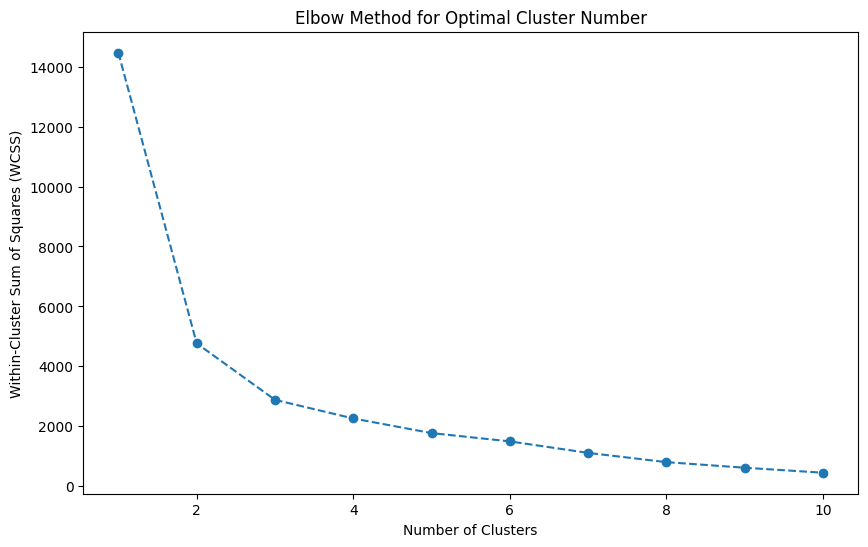

In [ ]:
# Feature matrix
X = df[['Recency_Score', 'RFM_Category_encoded']]

# Elbow Method to find the optimal number of clusters
wcss = []  # Within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Cluster Number')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


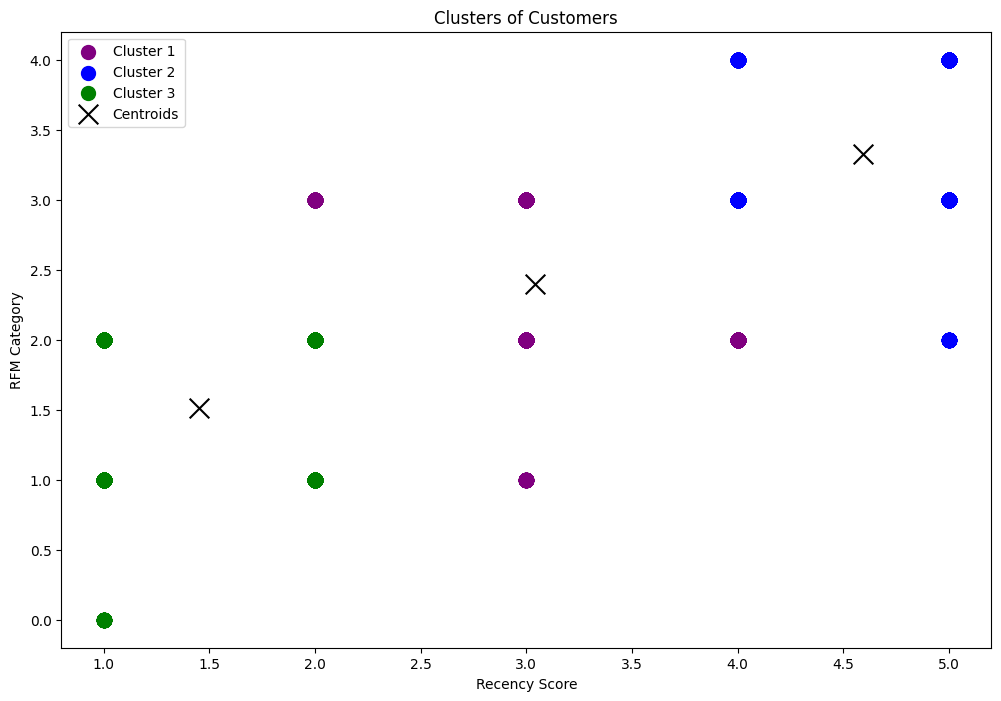

In [ ]:
from sklearn.cluster import KMeans
X = df[['Recency_Score', 'RFM_Category_encoded']]
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Scatter plot for Recency_Score and RFM_Category3
plt.figure(figsize=(12, 8))
colors = {0: 'purple', 1: 'blue', 2: 'green', 3: 'orange', 4: 'red'}
for cluster in range(num_clusters):
    plt.scatter(df['Recency_Score'][df['Cluster'] == cluster], df['RFM_Category_encoded'][df['Cluster'] == cluster], s=100, c=colors[cluster], label=f'Cluster {cluster + 1}')

# Centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', label='Centroids', marker='x', s=200)

# Labels and title
plt.title('Clusters of Customers')
plt.xlabel('Recency Score')
plt.ylabel('RFM Category')
plt.legend()
plt.show()

The visitors are grouped into 3 clusters based on how recent they have visited Qatar.

The green cluster represnts the least interested visitors while the blue represents the high-valued visitors and purple one are in between.



**Option 2: RFM_category with nationality_group**

Profiling the RFM category based on nationality group

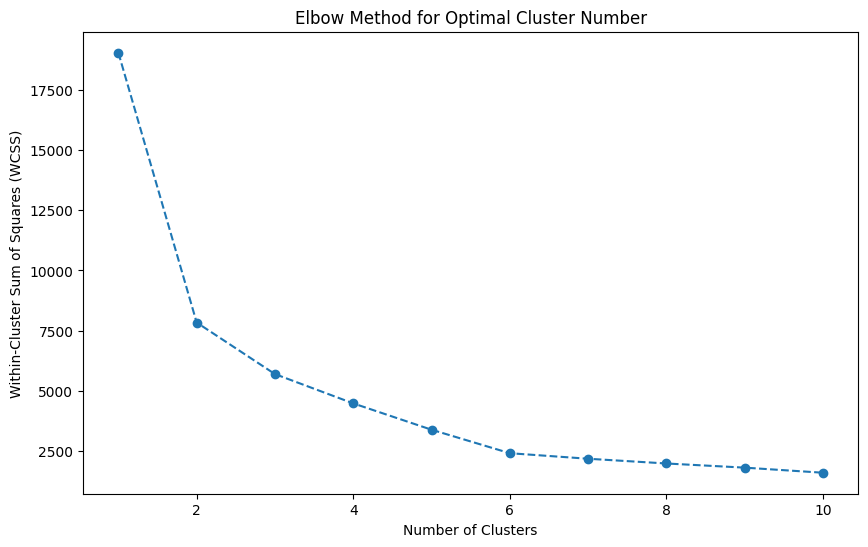

In [ ]:
X = df[['arrival_nationality_encoded', 'RFM_Category_encoded']]

# Elbow Method to find the optimal number of clusters
wcss = []  # Within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Cluster Number')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


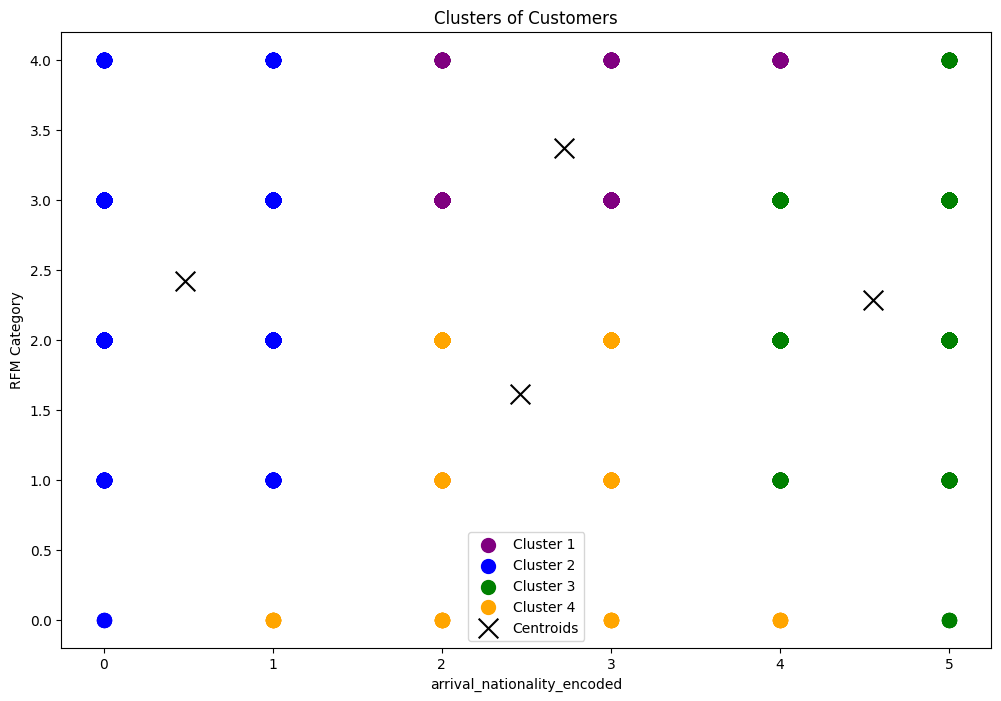

In [ ]:
from sklearn.cluster import KMeans
X = df[['arrival_nationality_encoded', 'RFM_Category_encoded']]
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Scatter plot for Recency_Score and RFM_Category3
plt.figure(figsize=(12, 8))
colors = {0: 'purple', 1: 'blue', 2: 'green', 3: 'orange', 4: 'red'}
for cluster in range(num_clusters):
    plt.scatter(df['arrival_nationality_encoded'][df['Cluster'] == cluster], df['RFM_Category_encoded'][df['Cluster'] == cluster], s=100, c=colors[cluster], label=f'Cluster {cluster + 1}')

# Centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', label='Centroids', marker='x', s=200)

# Labels and title
plt.title('Clusters of Customers')
plt.xlabel('arrival_nationality_encoded')
plt.ylabel('RFM Category')
plt.legend()
plt.show()



Side NOTE: The targetted marketting are abit clear now. for example we can offer the green cluster some package that inlcude spice of their interest based on for example hobby, occupation . we can advertise them about some workshops that rae goona take place in qatar as per their occupation that would benefit them , also some entertainment events/festival based on their hobby.

we can also do targetted marketting for othe rtwo cluster in similar approach with diff idea.

additionally this is just one way of clustering we can have many option of clustering for example:
RFM_category with montary_score where we can suggest high spenders some thing and low one something else


if we adjust the data later we can also have some of teh following as well:.
RFM_category with nationality_group,
\recency score with nationality . here we can view what sort of nationalities arrived qatar and how recent .



# Trials - Ignore

In [ ]:
# Addressing the SettingWithCopyWarning by creating a copy of the selected data
data_rfm_selected = df.copy()

# Encoding categorical variables
data_rfm_selected['Occupation'] = le.fit_transform(data_rfm_selected['Occupation'])
data_rfm_selected['climate_preferences'] = le.fit_transform(data_rfm_selected['climate_preferences'])
data_rfm_selected['arrival_nationality'] = le.fit_transform(data_rfm_selected['arrival_nationality'])

# Scaling the numerical features
data_rfm_scaled = pd.DataFrame(scaler.fit_transform(data_rfm_selected), columns=data_rfm_selected.columns)

# Reduce the range of K for the elbow method to make it more efficient
# Optionally, sample the data if the dataset is very large (uncomment the next line)
# data_rfm_scaled_sampled = data_rfm_scaled.sample(frac=0.1, random_state=42)

inertia_rfm = []
# Using a smaller range for K (e.g., 1 to 7)
for i in range(1, 8):
    kmeans_rfm = KMeans(n_clusters=i, random_state=42)
    kmeans_rfm.fit(data_rfm_scaled)  # replace with data_rfm_scaled_sampled if sampling
    inertia_rfm.append(kmeans_rfm.inertia_)

# Plotting the Elbow plot for RFM
plt.figure(figsize=(10, 6))
plt.plot(range(1, 8), inertia_rfm, marker='o')
plt.title('Elbow Method for RFM')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


NameError: name 'df' is not defined